# First Neural Network

#### Help from the book ["Deep Learning with Python"](https://www.manning.com/books/deep-learning-with-python)
This book was written by Francois Chollet.

The USPS, UPS and FedEx all employ image reconition to examine waybills to make sure letters and parcels make it to their destination.

The dataset we are going to workwith is supplied by the National Institute of Standards and Technology (MNIST). This dataset is kind of the "Hello World" of **Deep Learning**.

In [33]:
from keras.datasets import mnist

Lets bring our data in. We are going to form our training and testing sets.

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

What are we working with here?

#### Training Set

In [35]:
# Training
train_images.shape

(60000, 28, 28)

We have 60K training images that are 28 by 28 bits. Below we have 9 lables. This is a 3D tensor of 8-bit integers. So, a matrix of 60K matrices of 28 by 8 integers. Each matrix is a grayscale image with coefficents between zero and 255.

If we look at the 5th digit in the 3D tensor it would appear to look like the number 2.

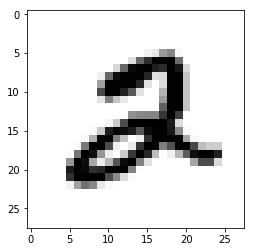

In [36]:
digit = train_images[5]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [37]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Test Set

In [38]:
test_images.shape

(10000, 28, 28)

Our test set is 10K images.

### Lets build a Neural Network

We are going to use the images to teach the network to associate the images with the correct label. We will use our result from our training data on our test data to see if our Neural Network is a good model.

In [39]:
# Network arch
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

This network is a sequence of two layers. These are dense layers, or fully connected neural layers. The second layer in the above code is a 10-way softmax layer. This will output 10 probability scores that will sum to one. Each score will be the probability that the current digti image belongs to the one of the 10 digit classes.

We now need three things:
1. A **loss function** bascially how the network measures its performance on the training data.
2. An **optimizer** is ahow the network will update itself based on the data it sees and its loss function.
3. **Metrics** think simple like accuracy.

In [40]:
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Prep the image data.

In [41]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

Prepare the lables

In [42]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Fit the model

In [43]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2569 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1015 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0687 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0493 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0373 - acc: 0.9887


By the 5th epoch our score reached 98.9% accuracy. Seems pretty good huh. Lets see what this does on our test data.

In [44]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 41us/step
test_acc: 0.9807


We lost some accuracy. It would appear that we may have overfit the model a little. Overall we saw how easy it is to create a neural network.